In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("london_weather.csv")
df = pd.DataFrame(data)

In [6]:
df.drop("date",axis=1,inplace=True)

In [7]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [8]:
df.corr()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
cloud_cover,1.000000,-0.738291,-0.485973,-0.212224,-0.110556,0.048838,0.235269,-0.241955,-0.001256
sunshine,-0.738291,1.000000,0.852632,0.472182,0.396535,0.219082,-0.231636,0.226943,-0.034222
global_radiation,-0.485973,0.852632,1.000000,0.690946,0.635432,0.478119,-0.162668,0.150078,-0.061781
max_temp,-0.212224,0.472182,0.690946,1.000000,0.912200,0.810514,-0.071799,0.100455,-0.130594
mean_temp,-0.110556,0.396535,0.635432,0.912200,1.000000,0.955593,-0.010462,0.004764,-0.154945
min_temp,0.048838,0.219082,0.478119,0.810514,0.955593,1.000000,0.037233,-0.074274,-0.157882
precipitation,0.235269,-0.231636,-0.162668,-0.071799,-0.010462,0.037233,1.000000,-0.349456,-0.001352
pressure,-0.241955,0.226943,0.150078,0.100455,0.004764,-0.074274,-0.349456,1.000000,-0.021229
snow_depth,-0.001256,-0.034222,-0.061781,-0.130594,-0.154945,-0.157882,-0.001352,-0.021229,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [11]:
df.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [36]:
df.dropna(inplace=True)
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
13838,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
13839,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
13840,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
13841,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


In [37]:
df.corr()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
cloud_cover,1.000000,-0.734598,-0.466202,-0.184016,-0.084180,0.071692,0.229224,-0.237053,-0.001365
sunshine,-0.734598,1.000000,0.851249,0.468120,0.397064,0.222065,-0.226453,0.219350,-0.033778
global_radiation,-0.466202,0.851249,1.000000,0.687035,0.635150,0.479892,-0.157646,0.144784,-0.061488
max_temp,-0.184016,0.468120,0.687035,1.000000,0.907365,0.806246,-0.067437,0.099683,-0.130107
mean_temp,-0.084180,0.397064,0.635150,0.907365,1.000000,0.955716,-0.007041,0.004609,-0.154469
min_temp,0.071692,0.222065,0.479892,0.806246,0.955716,1.000000,0.037195,-0.070920,-0.157537
precipitation,0.229224,-0.226453,-0.157646,-0.067437,-0.007041,0.037195,1.000000,-0.347647,-0.002357
pressure,-0.237053,0.219350,0.144784,0.099683,0.004609,-0.070920,-0.347647,1.000000,-0.020581
snow_depth,-0.001365,-0.033778,-0.061488,-0.130107,-0.154469,-0.157537,-0.002357,-0.020581,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       13843 non-null  float64
 1   sunshine          13843 non-null  float64
 2   global_radiation  13843 non-null  float64
 3   max_temp          13843 non-null  float64
 4   mean_temp         13843 non-null  float64
 5   min_temp          13843 non-null  float64
 6   precipitation     13843 non-null  float64
 7   pressure          13843 non-null  float64
 8   snow_depth        13843 non-null  float64
dtypes: float64(9)
memory usage: 973.5 KB


In [51]:
df.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,13843.00000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,5.32818,4.262609,114.529148,14.951911,11.085408,7.212302,1.667493,101538.493101,0.037853
std,2.03417,3.987488,87.758136,6.510220,5.700936,5.319409,3.733947,1066.084413,0.545712
min,0.00000,0.000000,12.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.00000,0.400000,39.000000,10.200000,6.800000,3.200000,0.000000,100900.000000,0.000000
50%,6.00000,3.400000,89.000000,14.400000,10.800000,7.300000,0.000000,101630.000000,0.000000
75%,7.00000,7.100000,180.000000,19.700000,15.550000,11.400000,1.600000,102260.000000,0.000000
max,9.00000,15.700000,352.000000,37.900000,29.000000,22.300000,61.800000,104430.000000,22.000000


In [54]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
13838,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
13839,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
13840,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
13841,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


Text(0, 0.5, 'global_radiation')

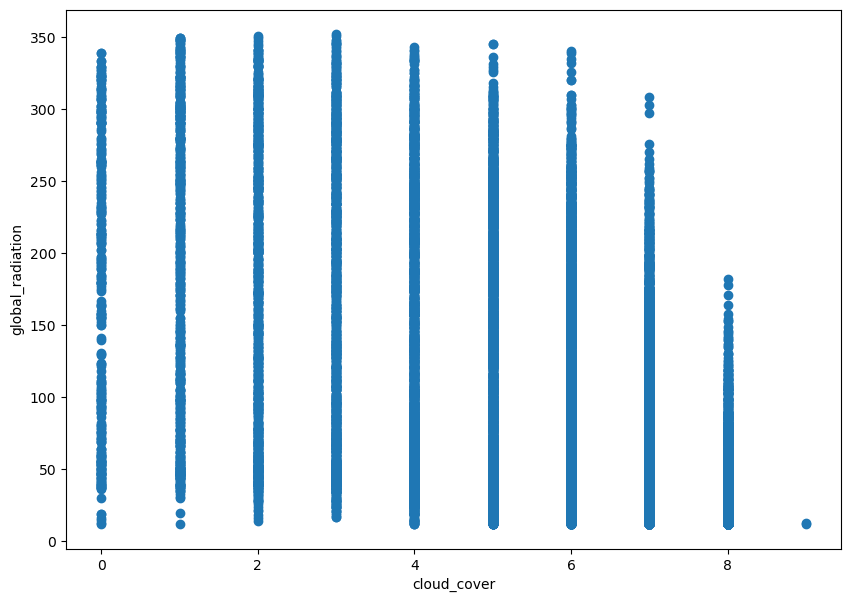

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(x=df["cloud_cover"],y=df["global_radiation"])
plt.xlabel("cloud_cover")
plt.ylabel("global_radiation")

In [62]:
for i in df.index:
    if df.loc[i,"sunshine"] == 0.0:
        df.loc[i,"sunshine"] = df["sunshine"].median()
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.000000,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.700000,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,4.262609,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,4.262917,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.000000,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
13838,8.0,5.076126,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
13839,8.0,5.076492,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
13840,6.0,2.200000,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
13841,0.0,3.600000,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


Text(0, 0.5, 'sunshine')

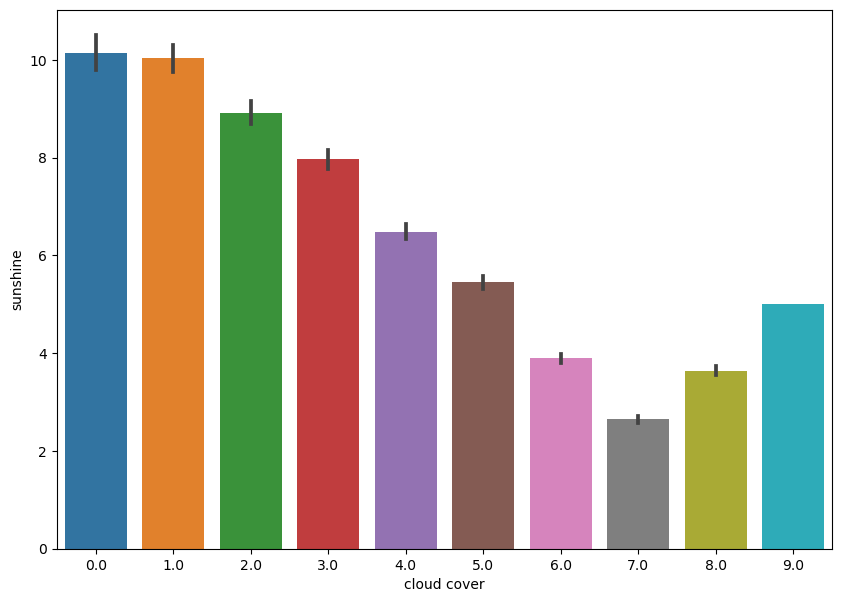

In [64]:
plt.figure(figsize=(10,7))
sns.barplot(x=df["cloud_cover"],y=df["sunshine"])
plt.xlabel("cloud cover")
plt.ylabel("sunshine")

In [72]:
df_global = df.sort_values("global_radiation")
df_sunshine = df.sort_values("sunshine")

Text(0, 0.5, 'sunshine')

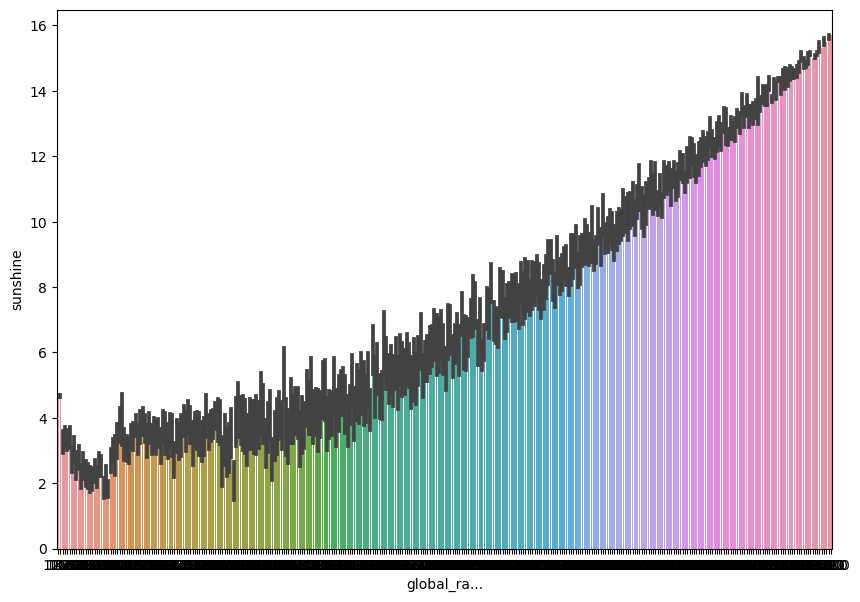

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_global["global_radiation"],y=df_sunshine["sunshine"])
plt.xlabel("global_ra...")
plt.ylabel("sunshine")

Text(0, 0.5, 'sunshine')

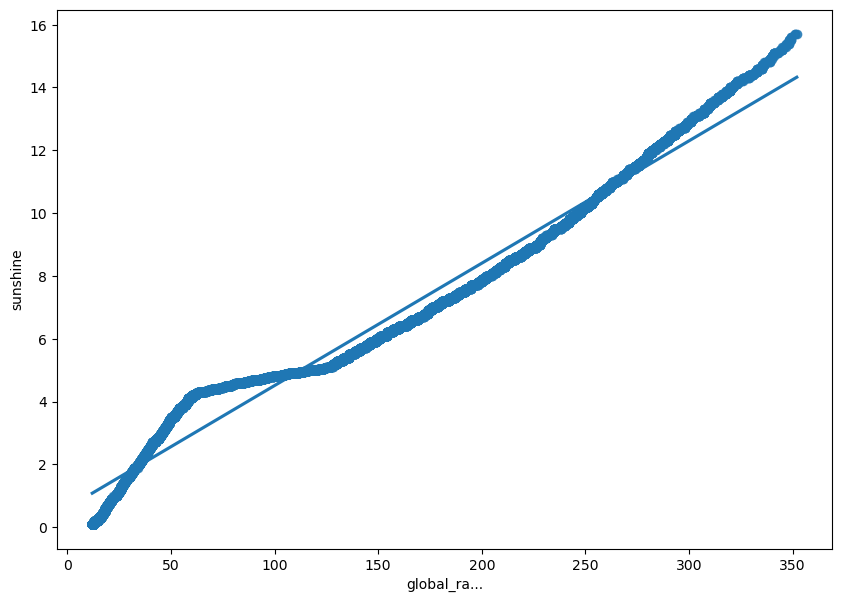

In [92]:
plt.figure(figsize=(10,7))
sns.regplot(x=df_global["global_radiation"],y=df_sunshine["sunshine"])
plt.xlabel("global_ra...")
plt.ylabel("sunshine")

<Axes: xlabel='global_radiation', ylabel='min_temp'>

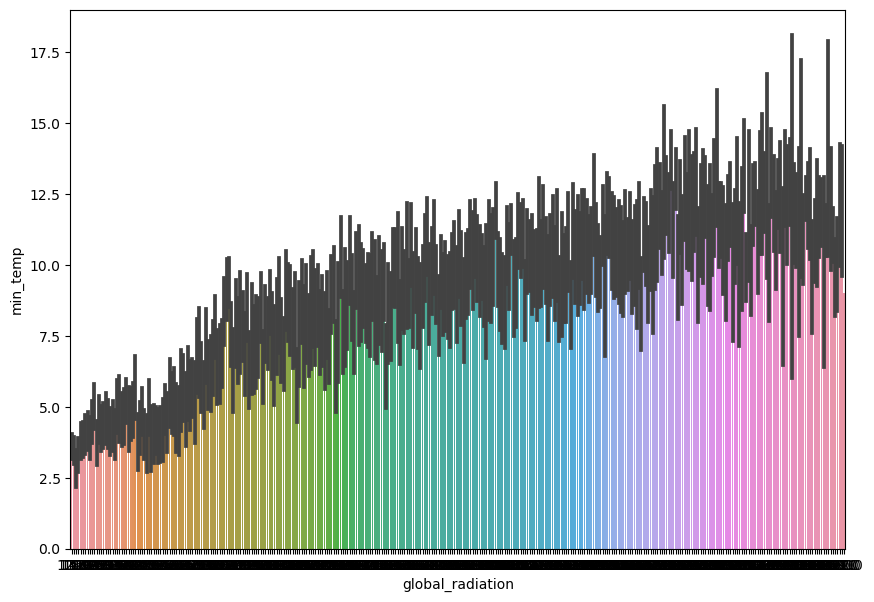

In [99]:
plt.figure(figsize=(10,7))
sns.barplot(x=df["global_radiation"],y=df.min_temp)

<Axes: xlabel='global_radiation', ylabel='mean_temp'>

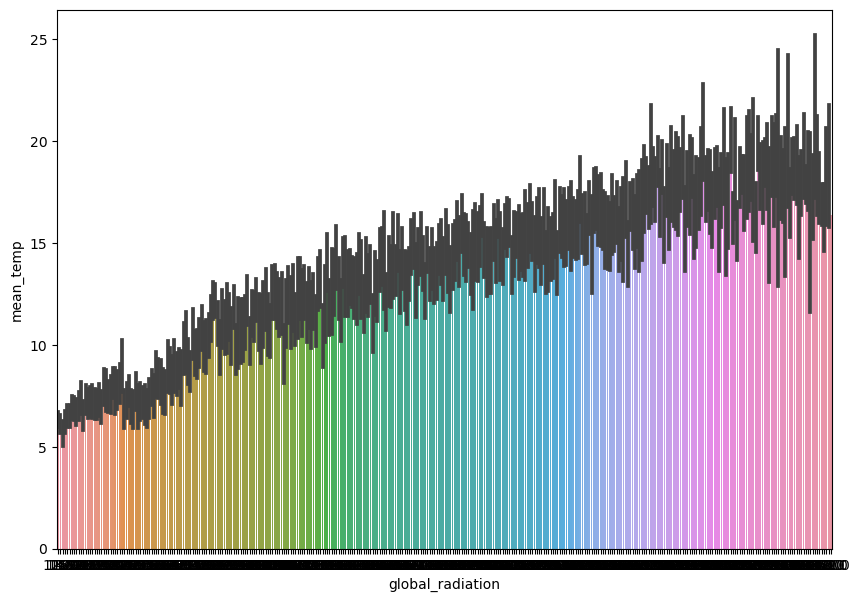

In [101]:
plt.figure(figsize=(10,7))
sns.barplot(x=df["global_radiation"],y=df.mean_temp)

<Axes: xlabel='global_radiation', ylabel='max_temp'>

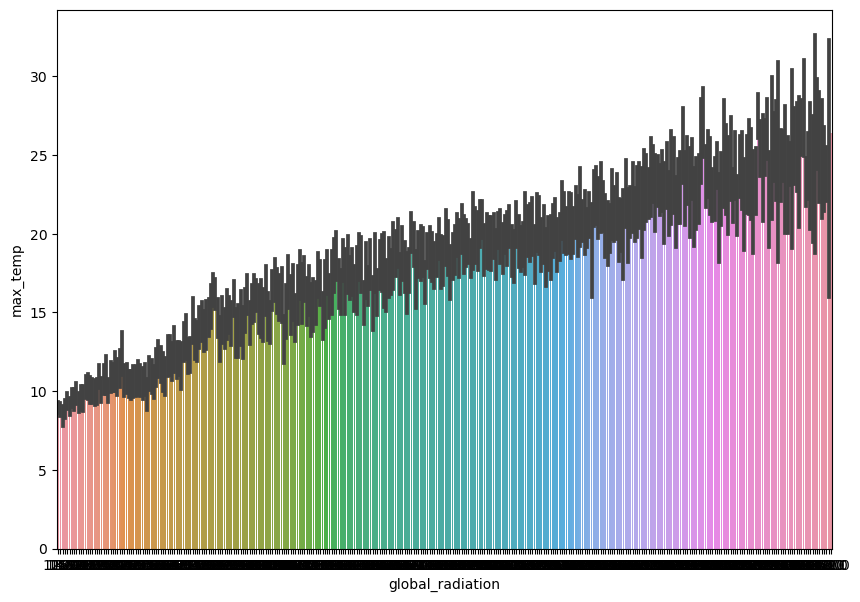

In [102]:
plt.figure(figsize=(10,7))
sns.barplot(x=df["global_radiation"],y=df.max_temp)

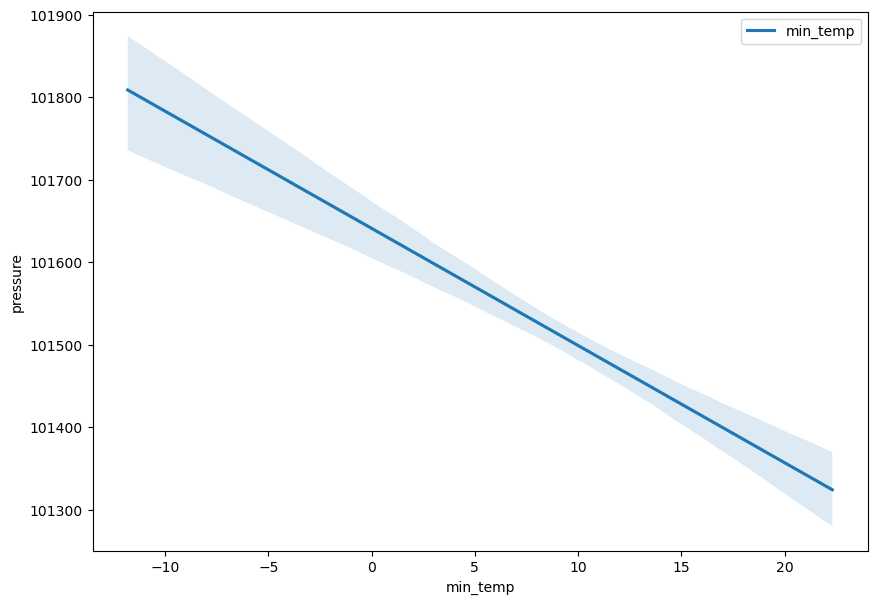

In [139]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["min_temp"],y=df.pressure,data=df,scatter=False)
plt.legend(["min_temp"])

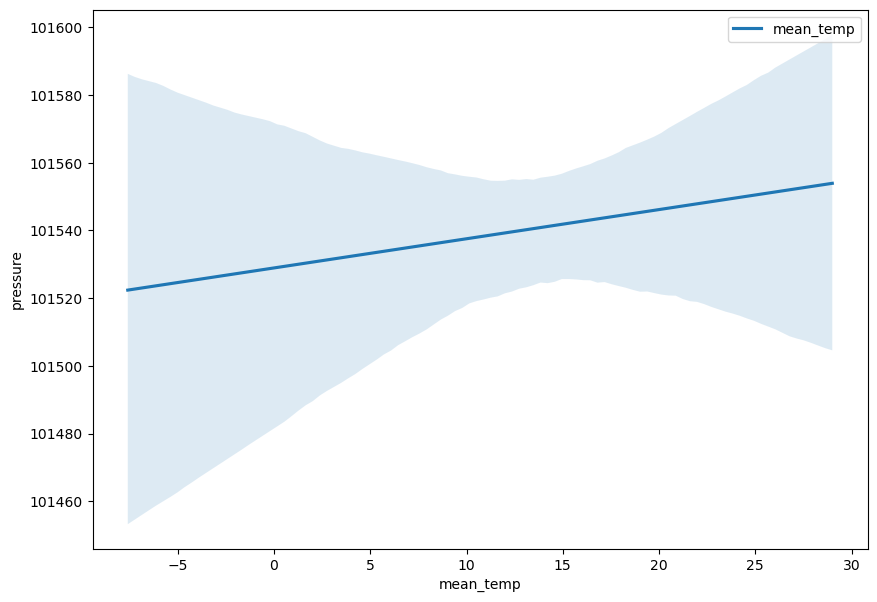

In [140]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["mean_temp"],y=df.pressure,data=df,scatter=False)
plt.legend(["mean_temp"])

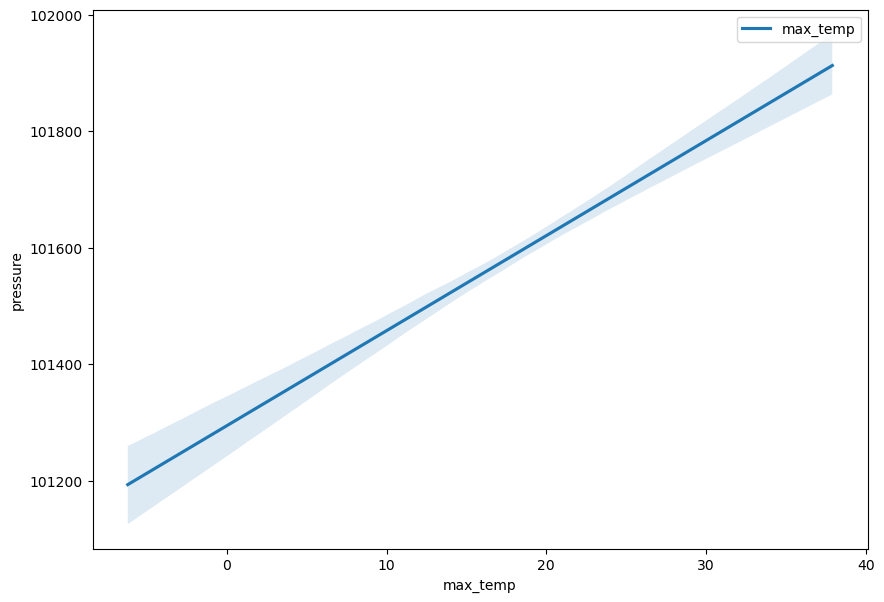

In [141]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["max_temp"],y=df.pressure,data=df,scatter=False)
plt.legend(["max_temp"])

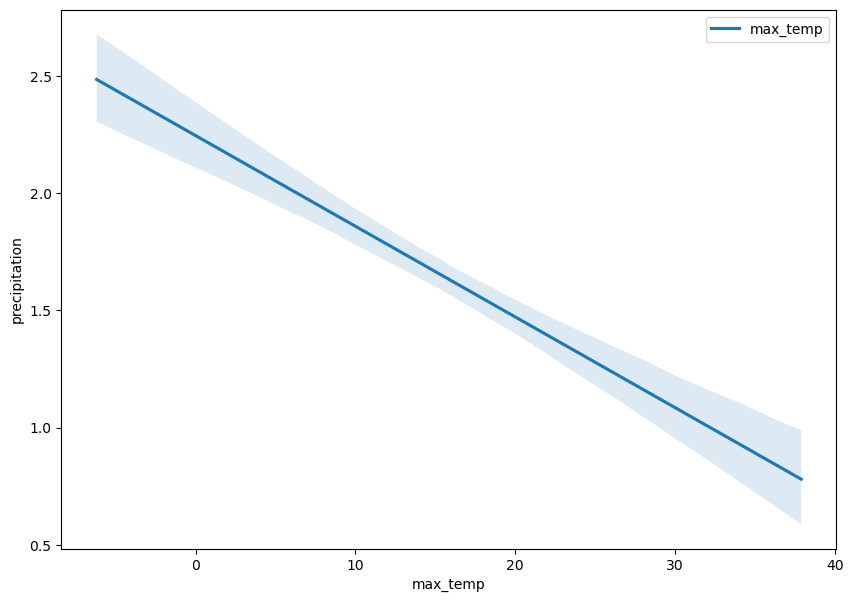

In [143]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["max_temp"],y=df.precipitation,data=df,scatter=False)
plt.legend(["max_temp"])

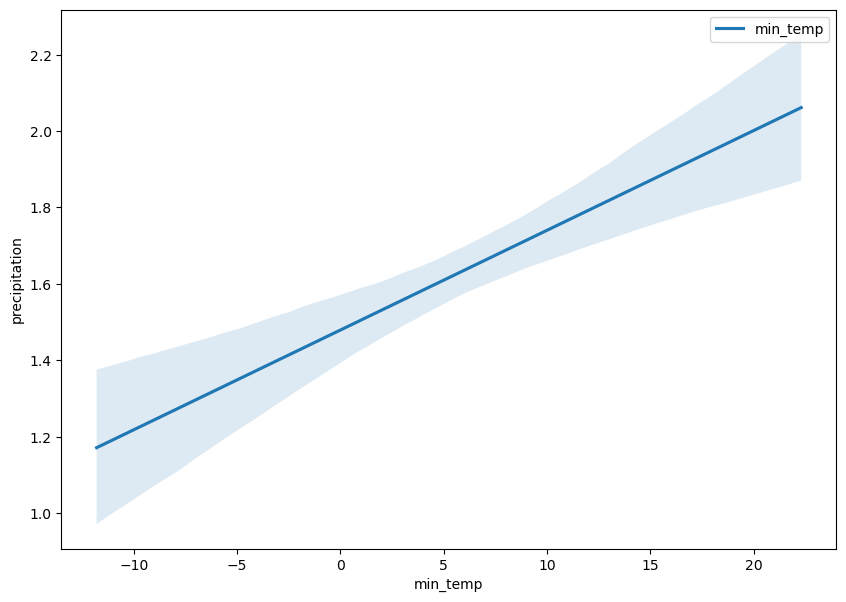

In [146]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["min_temp"],y=df.precipitation,data=df,scatter=False)
plt.legend(["min_temp"])

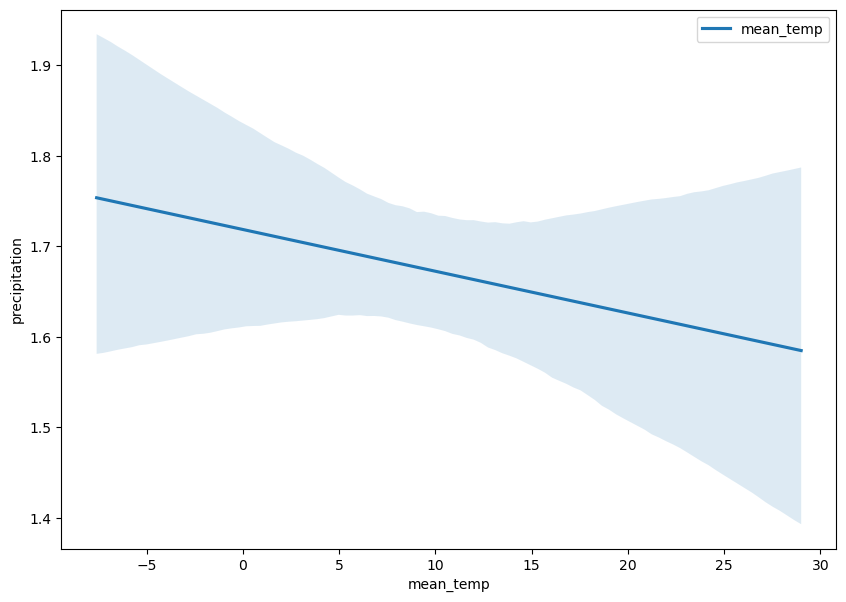

In [147]:
plt.figure(figsize=(10,7))
sns.regplot(x=df["mean_temp"],y=df.precipitation,data=df,scatter=False)
plt.legend(["mean_temp"])

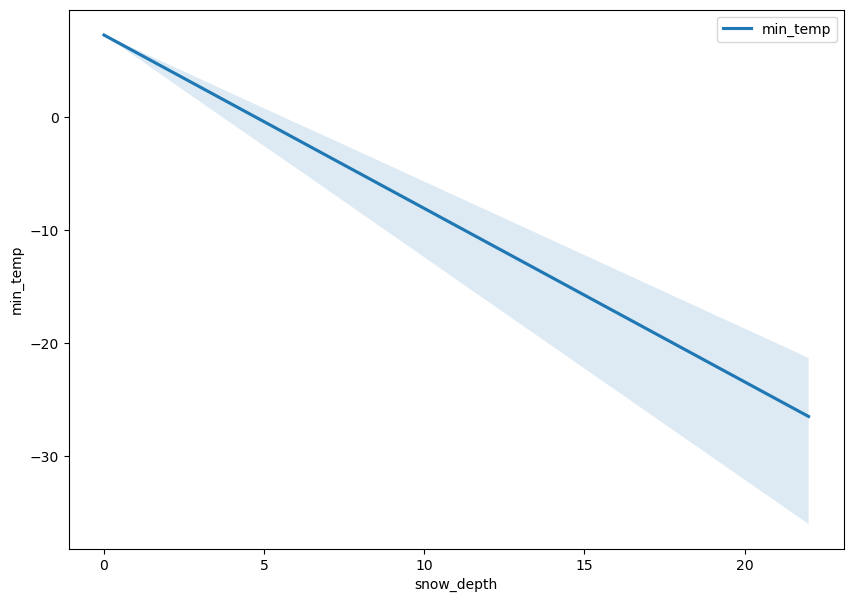

In [148]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.snow_depth,y=df["min_temp"],data=df,scatter=False)
plt.legend(["min_temp"])

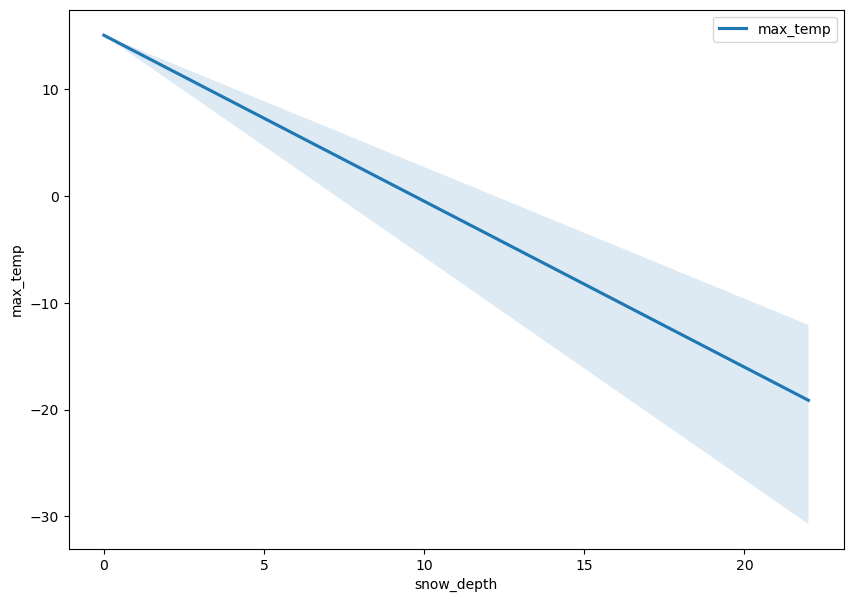

In [150]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.snow_depth,y=df["max_temp"],data=df,scatter=False)
plt.legend(["max_temp"])

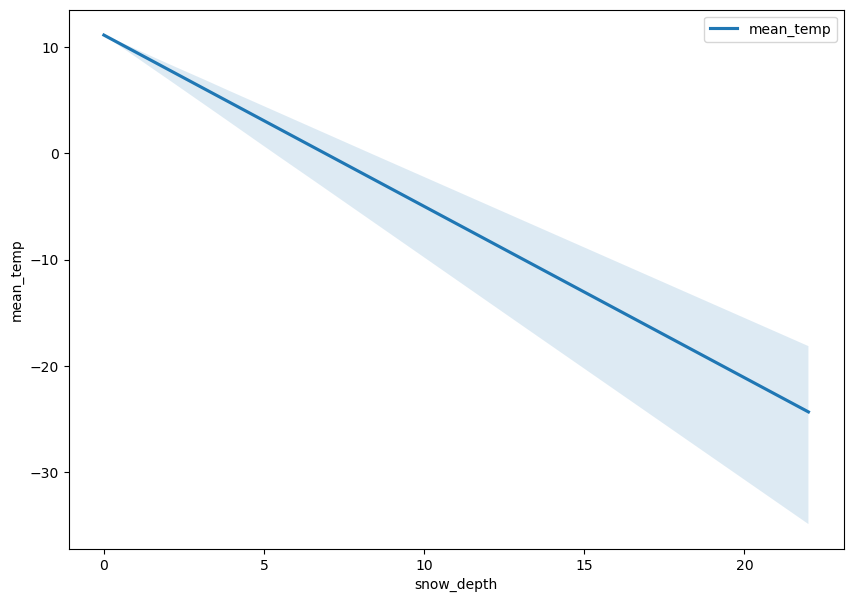

In [152]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.snow_depth,y=df["mean_temp"],data=df,scatter=False)
plt.legend(["mean_temp"])

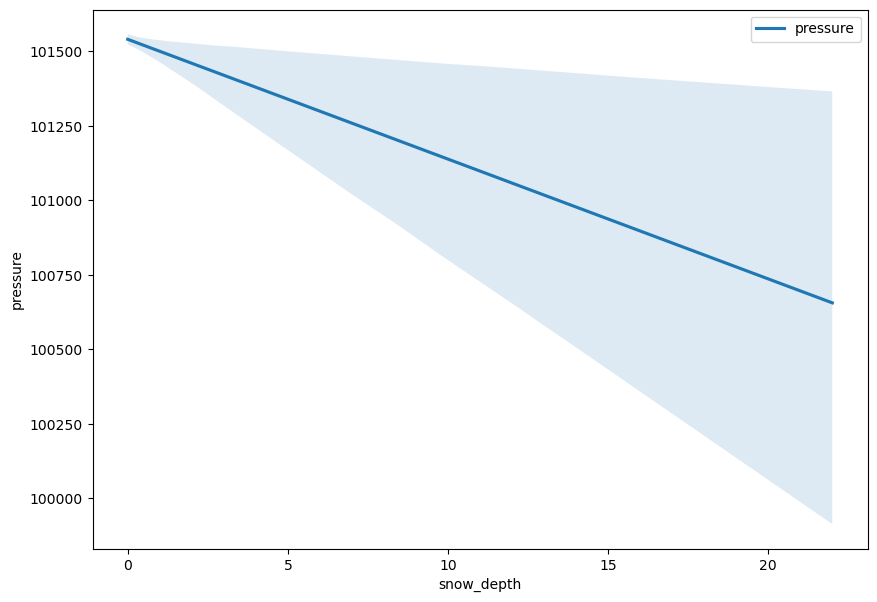

In [158]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.snow_depth,y=df["pressure"],data=df,scatter=False)
plt.legend(["pressure"])

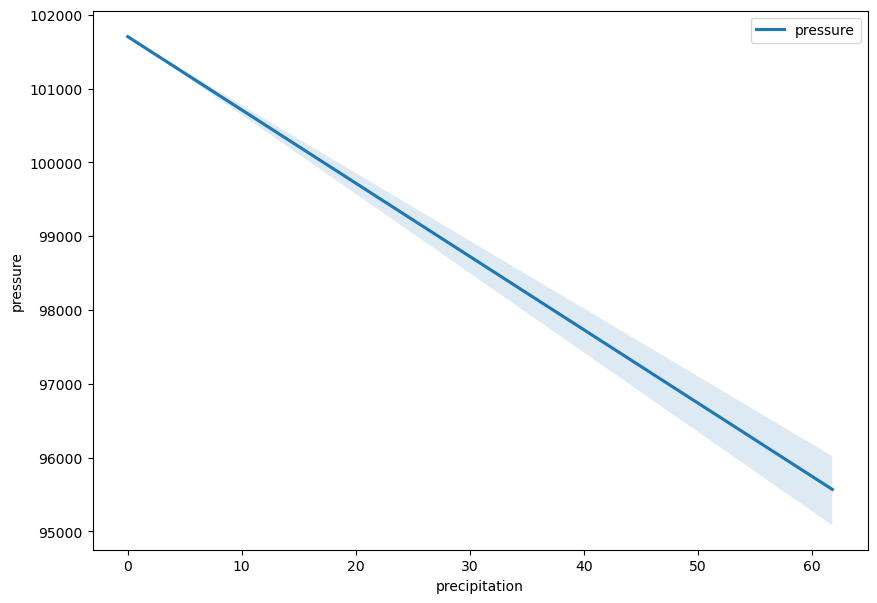

In [156]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.precipitation,y=df["pressure"],data=df,scatter=False)
plt.legend(["pressure"])